In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import zipfile

zf = zipfile.ZipFile('C:/Users/Reddymr2022/Lasso_Regression/Week-6-Task/Air Quality dataset(R) (2).zip') # having First.csv zipped file.
Air_file1 = pd.read_csv(zf.open('Air Quality dataset(R)/city_day.csv'))
Air_file2 = pd.read_csv(zf.open('Air Quality dataset(R)/city_hour.csv'))
Air_file3 = pd.read_csv(zf.open('Air Quality dataset(R)/station_day.csv'))
Air_file4 = pd.read_csv(zf.open('Air Quality dataset(R)/station_hour.csv'))
Air_file5 = pd.read_csv(zf.open('Air Quality dataset(R)/stations.csv'))

In [3]:
print(Air_file1.shape)
print(Air_file2.shape)

(29531, 16)
(707875, 16)


In [4]:
print(Air_file3.shape),
print(Air_file4.shape)

(108035, 16)
(2589083, 16)


In [5]:
print(Air_file5.shape)

(230, 5)


In [6]:
Air_file1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [7]:
Air_file1.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [8]:
Air_file1.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [9]:
a= round(Air_file1.isna().mean()*100,2)
a.sort_values(ascending=False)

Xylene        61.32
PM10          37.72
NH3           34.97
Toluene       27.23
Benzene       19.04
AQI           15.85
AQI_Bucket    15.85
PM2.5         15.57
NOx           14.17
O3            13.62
SO2           13.05
NO2           12.14
NO            12.13
CO             6.97
City           0.00
Date           0.00
dtype: float64

In [10]:
Air_file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [11]:
Air_file2.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [12]:
Air_file2.tail()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
707870,Visakhapatnam,2020-06-30 20:00:00,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,NaN,NaN,NaN,51.0,Satisfactory
707871,Visakhapatnam,2020-06-30 21:00:00,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,NaN,NaN,NaN,51.0,Satisfactory
707872,Visakhapatnam,2020-06-30 22:00:00,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,NaN,NaN,NaN,50.0,Good
707873,Visakhapatnam,2020-06-30 23:00:00,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,NaN,NaN,NaN,50.0,Good
707874,Visakhapatnam,2020-07-01 00:00:00,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [13]:
a= round(Air_file2.isna().mean()*100,2)
a.sort_values(ascending=False)

Xylene        64.39
PM10          41.92
NH3           38.50
Toluene       31.16
Benzene       23.12
PM2.5         20.50
SO2           18.42
O3            18.25
AQI           18.23
AQI_Bucket    18.23
NOx           17.41
NO2           16.55
NO            16.48
CO            12.22
City           0.00
Datetime       0.00
dtype: float64

In [14]:
Air_file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [15]:
Air_file3.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [16]:
Air_file3.tail()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
108030,WB013,2020-06-27,8.65,16.46,NaN,NaN,NaN,NaN,0.69,4.36,30.59,1.32,7.26,NaN,50.0,Good
108031,WB013,2020-06-28,11.80,18.47,NaN,NaN,NaN,NaN,0.68,3.49,38.95,1.42,7.92,NaN,65.0,Satisfactory
108032,WB013,2020-06-29,18.60,32.26,13.65,200.87,214.20,11.40,0.78,5.12,38.17,3.52,8.64,NaN,63.0,Satisfactory
108033,WB013,2020-06-30,16.07,39.30,7.56,29.13,36.69,29.26,0.69,5.88,29.64,1.86,8.40,NaN,57.0,Satisfactory
108034,WB013,2020-07-01,10.50,36.50,7.78,22.50,30.25,27.23,0.58,2.80,13.10,1.31,7.39,NaN,59.0,Satisfactory


In [17]:
a= round(Air_file3.isna().mean()*100,2)
a.sort_values(ascending=False)

Xylene        78.81
NH3           44.53
PM10          39.53
Toluene       35.82
Benzene       29.12
O3            23.67
SO2           23.33
PM2.5         20.02
AQI           19.45
AQI_Bucket    19.45
NO            15.83
NO2           15.32
NOx           14.35
CO            12.03
StationId      0.00
Date           0.00
dtype: float64

In [18]:
Air_file3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   StationId   108035 non-null  object 
 1   Date        108035 non-null  object 
 2   PM2.5       86410 non-null   float64
 3   PM10        65329 non-null   float64
 4   NO          90929 non-null   float64
 5   NO2         91488 non-null   float64
 6   NOx         92535 non-null   float64
 7   NH3         59930 non-null   float64
 8   CO          95037 non-null   float64
 9   SO2         82831 non-null   float64
 10  O3          82467 non-null   float64
 11  Benzene     76580 non-null   float64
 12  Toluene     69333 non-null   float64
 13  Xylene      22898 non-null   float64
 14  AQI         87025 non-null   float64
 15  AQI_Bucket  87025 non-null   object 
dtypes: float64(13), object(3)
memory usage: 13.2+ MB


In [19]:
Air_file4.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [20]:
Air_file4.tail()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2589078,WB013,2020-06-30 20:00:00,15.55,47.80,7.27,35.08,42.38,31.25,0.80,9.40,17.24,2.56,11.57,NaN,59.0,Satisfactory
2589079,WB013,2020-06-30 21:00:00,15.23,42.30,6.10,26.78,32.85,30.66,0.56,4.91,17.46,3.49,12.29,NaN,59.0,Satisfactory
2589080,WB013,2020-06-30 22:00:00,11.40,40.95,6.58,19.53,26.12,30.73,0.61,3.81,17.24,1.83,8.88,NaN,59.0,Satisfactory
2589081,WB013,2020-06-30 23:00:00,9.25,34.33,9.17,21.85,31.00,29.61,0.65,3.44,12.74,1.40,8.43,NaN,59.0,Satisfactory
2589082,WB013,2020-07-01 00:00:00,10.50,36.50,7.78,22.50,30.25,27.23,0.58,2.80,13.10,1.31,7.39,NaN,59.0,Satisfactory


In [21]:
a= round(Air_file4.isna().mean()*100,2)
a.sort_values(ascending=False)

Xylene        80.15
NH3           47.76
PM10          43.23
Toluene       40.26
Benzene       33.28
SO2           28.69
O3            28.04
PM2.5         25.02
AQI           22.02
AQI_Bucket    22.02
NO            21.39
NO2           20.43
CO            19.28
NOx           18.96
StationId      0.00
Datetime       0.00
dtype: float64

In [22]:
Air_file4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589083 entries, 0 to 2589082
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   StationId   object 
 1   Datetime    object 
 2   PM2.5       float64
 3   PM10        float64
 4   NO          float64
 5   NO2         float64
 6   NOx         float64
 7   NH3         float64
 8   CO          float64
 9   SO2         float64
 10  O3          float64
 11  Benzene     float64
 12  Toluene     float64
 13  Xylene      float64
 14  AQI         float64
 15  AQI_Bucket  object 
dtypes: float64(13), object(3)
memory usage: 316.1+ MB


In [23]:
Air_file5.head()

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active


In [24]:
Air_file5.tail()

,StationId,StationName,City,State,Status
225,WB010,"Jadavpur, Kolkata - WBPCB",Kolkata,West Bengal,Active
226,WB011,"Rabindra Bharati University, Kolkata - WBPCB",Kolkata,West Bengal,Active
227,WB012,"Rabindra Sarobar, Kolkata - WBPCB",Kolkata,West Bengal,Active
228,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active
229,WB014,"Ward-32 Bapupara, Siliguri - WBPCB",Siliguri,West Bengal,NaN


In [25]:
a= round(Air_file5.isna().mean()*100,2)
a.sort_values(ascending=False)

Status         42.17
StationId       0.00
StationName     0.00
City            0.00
State           0.00
dtype: float64

In [26]:
Air_file5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StationId    230 non-null    object
 1   StationName  230 non-null    object
 2   City         230 non-null    object
 3   State        230 non-null    object
 4   Status       133 non-null    object
dtypes: object(5)
memory usage: 9.1+ KB


In [27]:
df = pd.merge(Air_file1, Air_file3)

In [28]:
df = pd.merge(df, Air_file5)

In [29]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationId,StationName,State,Status
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active


In [30]:
df['Status'].nunique()

1

In [31]:
df['Air_Quality'] = df['AQI_Bucket'].fillna('Moderate')
df.drop('AQI_Bucket',axis=1,inplace =True)

In [32]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,StationId,StationName,State,Status,Air_Quality
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active,Moderate
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active,Moderate
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active,Moderate
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active,Moderate
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active,Moderate


In [33]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,StationId,StationName,State,Status,Air_Quality
16991,Kolkata,2018-11-01,23.18,41.36,39.35,41.77,80.39,15.74,0.88,2.65,21.77,4.39,8.05,NaN,94.0,WB013,"Victoria, Kolkata - WBPCB",West Bengal,Active,Satisfactory
16992,Kolkata,2018-11-02,30.72,62.59,54.56,60.43,114.91,11.35,1.08,4.48,18.50,4.35,9.05,NaN,114.0,WB013,"Victoria, Kolkata - WBPCB",West Bengal,Active,Moderate
16993,Kolkata,2018-11-03,41.75,78.82,31.62,68.24,99.86,15.20,1.11,5.74,25.91,4.51,7.87,NaN,125.0,WB013,"Victoria, Kolkata - WBPCB",West Bengal,Active,Moderate
16994,Kolkata,2018-11-04,30.55,51.67,3.55,42.36,45.91,17.79,0.84,5.90,32.05,1.87,7.28,NaN,92.0,WB013,"Victoria, Kolkata - WBPCB",West Bengal,Active,Satisfactory
16995,Kolkata,2018-11-05,32.08,56.14,4.79,46.63,51.42,13.55,0.95,11.74,28.77,1.65,6.94,NaN,63.0,WB013,"Victoria, Kolkata - WBPCB",West Bengal,Active,Satisfactory


In [34]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,12625.000000,9839.000000,13364.000000,13362.000000,13035.000000,8790.000000,14891.000000,13317.000000,13135.000000,12095.000000,9961.000000,7851.000000,12553.000000
mean,63.554162,102.477225,16.932957,25.327984,32.034833,13.774989,2.986226,18.790894,31.300841,3.458118,9.461503,3.598381,174.194933
std,65.706429,78.797406,22.862348,27.245999,32.412931,14.806380,9.154846,22.660799,22.818250,20.061636,25.747684,7.317542,168.599870
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,25.820000,48.735000,4.437500,9.272500,11.160000,6.040000,0.410000,6.080000,14.800000,0.000000,0.060000,0.100000,80.000000
50%,45.140000,85.110000,9.730000,16.190000,23.460000,9.410000,0.870000,10.870000,25.880000,0.520000,1.940000,1.020000,114.000000
75%,77.300000,132.250000,20.440000,31.247500,40.495000,15.557500,1.590000,21.620000,42.810000,3.290000,8.790000,4.340000,213.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,194.460000,175.810000,193.860000,172.280000,455.030000,454.850000,170.370000,2049.000000


In [35]:
df.isna().sum()

City              0
Date              0
PM2.5          4371
PM10           7157
NO             3632
NO2            3634
NOx            3961
NH3            8206
CO             2105
SO2            3679
O3             3861
Benzene        4901
Toluene        7035
Xylene         9145
AQI            4443
StationId         0
StationName       0
State             0
Status          324
Air_Quality       0
dtype: int64

In [36]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,StationId,StationName,State,Status,Air_Quality
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active,Moderate
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active,Moderate
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active,Moderate
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active,Moderate
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active,Moderate


In [37]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,12625.000000,9839.000000,13364.000000,13362.000000,13035.000000,8790.000000,14891.000000,13317.000000,13135.000000,12095.000000,9961.000000,7851.000000,12553.000000
mean,63.554162,102.477225,16.932957,25.327984,32.034833,13.774989,2.986226,18.790894,31.300841,3.458118,9.461503,3.598381,174.194933
std,65.706429,78.797406,22.862348,27.245999,32.412931,14.806380,9.154846,22.660799,22.818250,20.061636,25.747684,7.317542,168.599870
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,25.820000,48.735000,4.437500,9.272500,11.160000,6.040000,0.410000,6.080000,14.800000,0.000000,0.060000,0.100000,80.000000
50%,45.140000,85.110000,9.730000,16.190000,23.460000,9.410000,0.870000,10.870000,25.880000,0.520000,1.940000,1.020000,114.000000
75%,77.300000,132.250000,20.440000,31.247500,40.495000,15.557500,1.590000,21.620000,42.810000,3.290000,8.790000,4.340000,213.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,194.460000,175.810000,193.860000,172.280000,455.030000,454.850000,170.370000,2049.000000


In [38]:
df = df.drop(['Xylene'],axis=1)

In [39]:
df.isna().sum()

City              0
Date              0
PM2.5          4371
PM10           7157
NO             3632
NO2            3634
NOx            3961
NH3            8206
CO             2105
SO2            3679
O3             3861
Benzene        4901
Toluene        7035
AQI            4443
StationId         0
StationName       0
State             0
Status          324
Air_Quality       0
dtype: int64

In [40]:
df.isna().mean()*100

City            0.000000
Date            0.000000
PM2.5          25.717816
PM10           42.109908
NO             21.369734
NO2            21.381502
NOx            23.305484
NH3            48.281949
CO             12.385267
SO2            21.646270
O3             22.717110
Benzene        28.836197
Toluene        41.392092
AQI            26.141445
StationId       0.000000
StationName     0.000000
State           0.000000
Status          1.906331
Air_Quality     0.000000
dtype: float64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16996 entries, 0 to 16995
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         16996 non-null  object 
 1   Date         16996 non-null  object 
 2   PM2.5        12625 non-null  float64
 3   PM10         9839 non-null   float64
 4   NO           13364 non-null  float64
 5   NO2          13362 non-null  float64
 6   NOx          13035 non-null  float64
 7   NH3          8790 non-null   float64
 8   CO           14891 non-null  float64
 9   SO2          13317 non-null  float64
 10  O3           13135 non-null  float64
 11  Benzene      12095 non-null  float64
 12  Toluene      9961 non-null   float64
 13  AQI          12553 non-null  float64
 14  StationId    16996 non-null  object 
 15  StationName  16996 non-null  object 
 16  State        16996 non-null  object 
 17  Status       16672 non-null  object 
 18  Air_Quality  16996 non-null  object 
dtypes: f

In [42]:
df = df.drop(['PM10','NH3','Toluene'],axis=1)

In [43]:
df['PM2.5'] = df['PM2.5'].fillna(df['PM2.5'].mean())
df['NO'] = df['NO'].fillna(df['NO'].mean())
df['NO2'] = df['NO2'].fillna(df['NO2'].mean())
df['NOx'] = df['NOx'].fillna(df['NOx'].mean())
df['CO'] = df['CO'].fillna(df['CO'].mean())
df['SO2'] = df['SO2'].fillna(df['SO2'].mean())
df['O3'] = df['O3'].fillna(df['O3'].mean())
df['Benzene'] = df['Benzene'].fillna(df['Benzene'].mean())
df['AQI'] = df['AQI'].fillna(df['AQI'].mean())
df['StationId'] = df['StationId'].fillna(df['StationId'].mode()[0])
df['StationName'] = df['StationName'].fillna(df['StationName'].mode()[0])
df['State'] = df['State'].fillna(df['State'].mode()[0])
df['Status'] = df['Status'].fillna(df['Status'].mode()[0])
df['Air_Quality'] = df['Air_Quality'].fillna(df['Air_Quality'].mode()[0])

In [44]:
df.isna().sum()

City           0
Date           0
PM2.5          0
NO             0
NO2            0
NOx            0
CO             0
SO2            0
O3             0
Benzene        0
AQI            0
StationId      0
StationName    0
State          0
Status         0
Air_Quality    0
dtype: int64

In [45]:
df

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,AQI,StationId,StationName,State,Status,Air_Quality
0,Ahmedabad,2015-01-01,63.554162,0.92,18.22,17.15,0.92,27.64,133.36,0.00,174.194933,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active,Moderate
1,Ahmedabad,2015-01-02,63.554162,0.97,15.69,16.46,0.97,24.55,34.06,3.68,174.194933,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active,Moderate
2,Ahmedabad,2015-01-03,63.554162,17.40,19.30,29.70,17.40,29.07,30.70,6.80,174.194933,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active,Moderate
3,Ahmedabad,2015-01-04,63.554162,1.70,18.48,17.97,1.70,18.59,36.08,4.43,174.194933,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active,Moderate
4,Ahmedabad,2015-01-05,63.554162,22.10,21.42,37.76,22.10,39.33,39.31,7.01,174.194933,GJ001,"Maninagar, Ahmedabad - GPCB",Gujarat,Active,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16991,Kolkata,2018-11-01,23.180000,39.35,41.77,80.39,0.88,2.65,21.77,4.39,94.000000,WB013,"Victoria, Kolkata - WBPCB",West Bengal,Active,Satisfactory
16992,Kolkata,2018-11-02,30.720000,54.56,60.43,114.91,1.08,4.48,18.50,4.35,114.000000,WB013,"Victoria, Kolkata - WBPCB",West Bengal,Active,Moderate
16993,Kolkata,2018-11-03,41.750000,31.62,68.24,99.86,1.11,5.74,25.91,4.51,125.000000,WB013,"Victoria, Kolkata - WBPCB",West Bengal,Active,Moderate
16994,Kolkata,2018-11-04,30.550000,3.55,42.36,45.91,0.84,5.90,32.05,1.87,92.000000,WB013,"Victoria, Kolkata - WBPCB",West Bengal,Active,Satisfactory


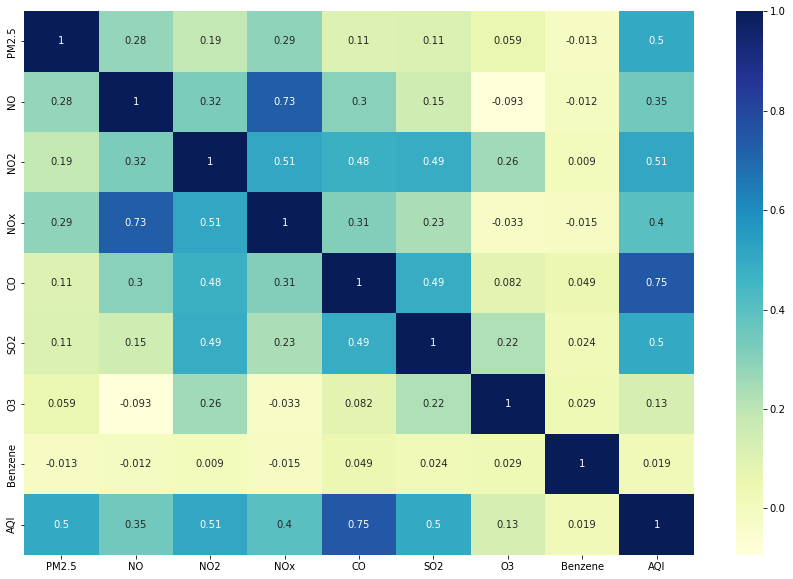

In [46]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

<AxesSubplot:xlabel='AQI', ylabel='Density'>

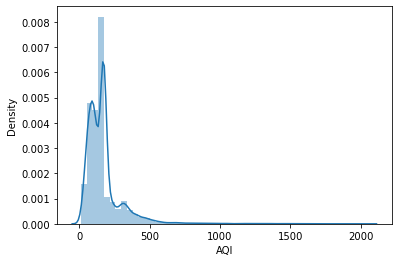

In [47]:
#Need to handle with outliers
sns.distplot(df['AQI'])

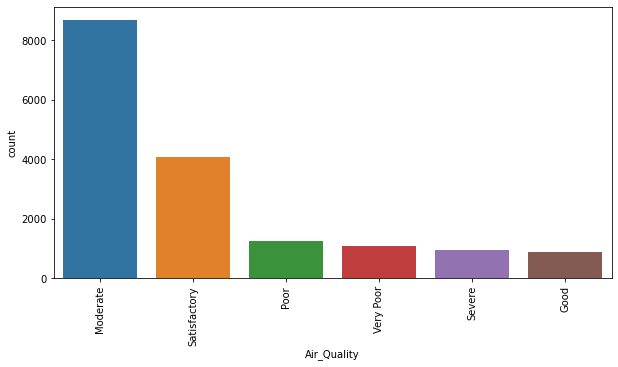

In [48]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='Air_Quality',data=df, ax = ax, order = df['Air_Quality'].value_counts().iloc[:10].index)

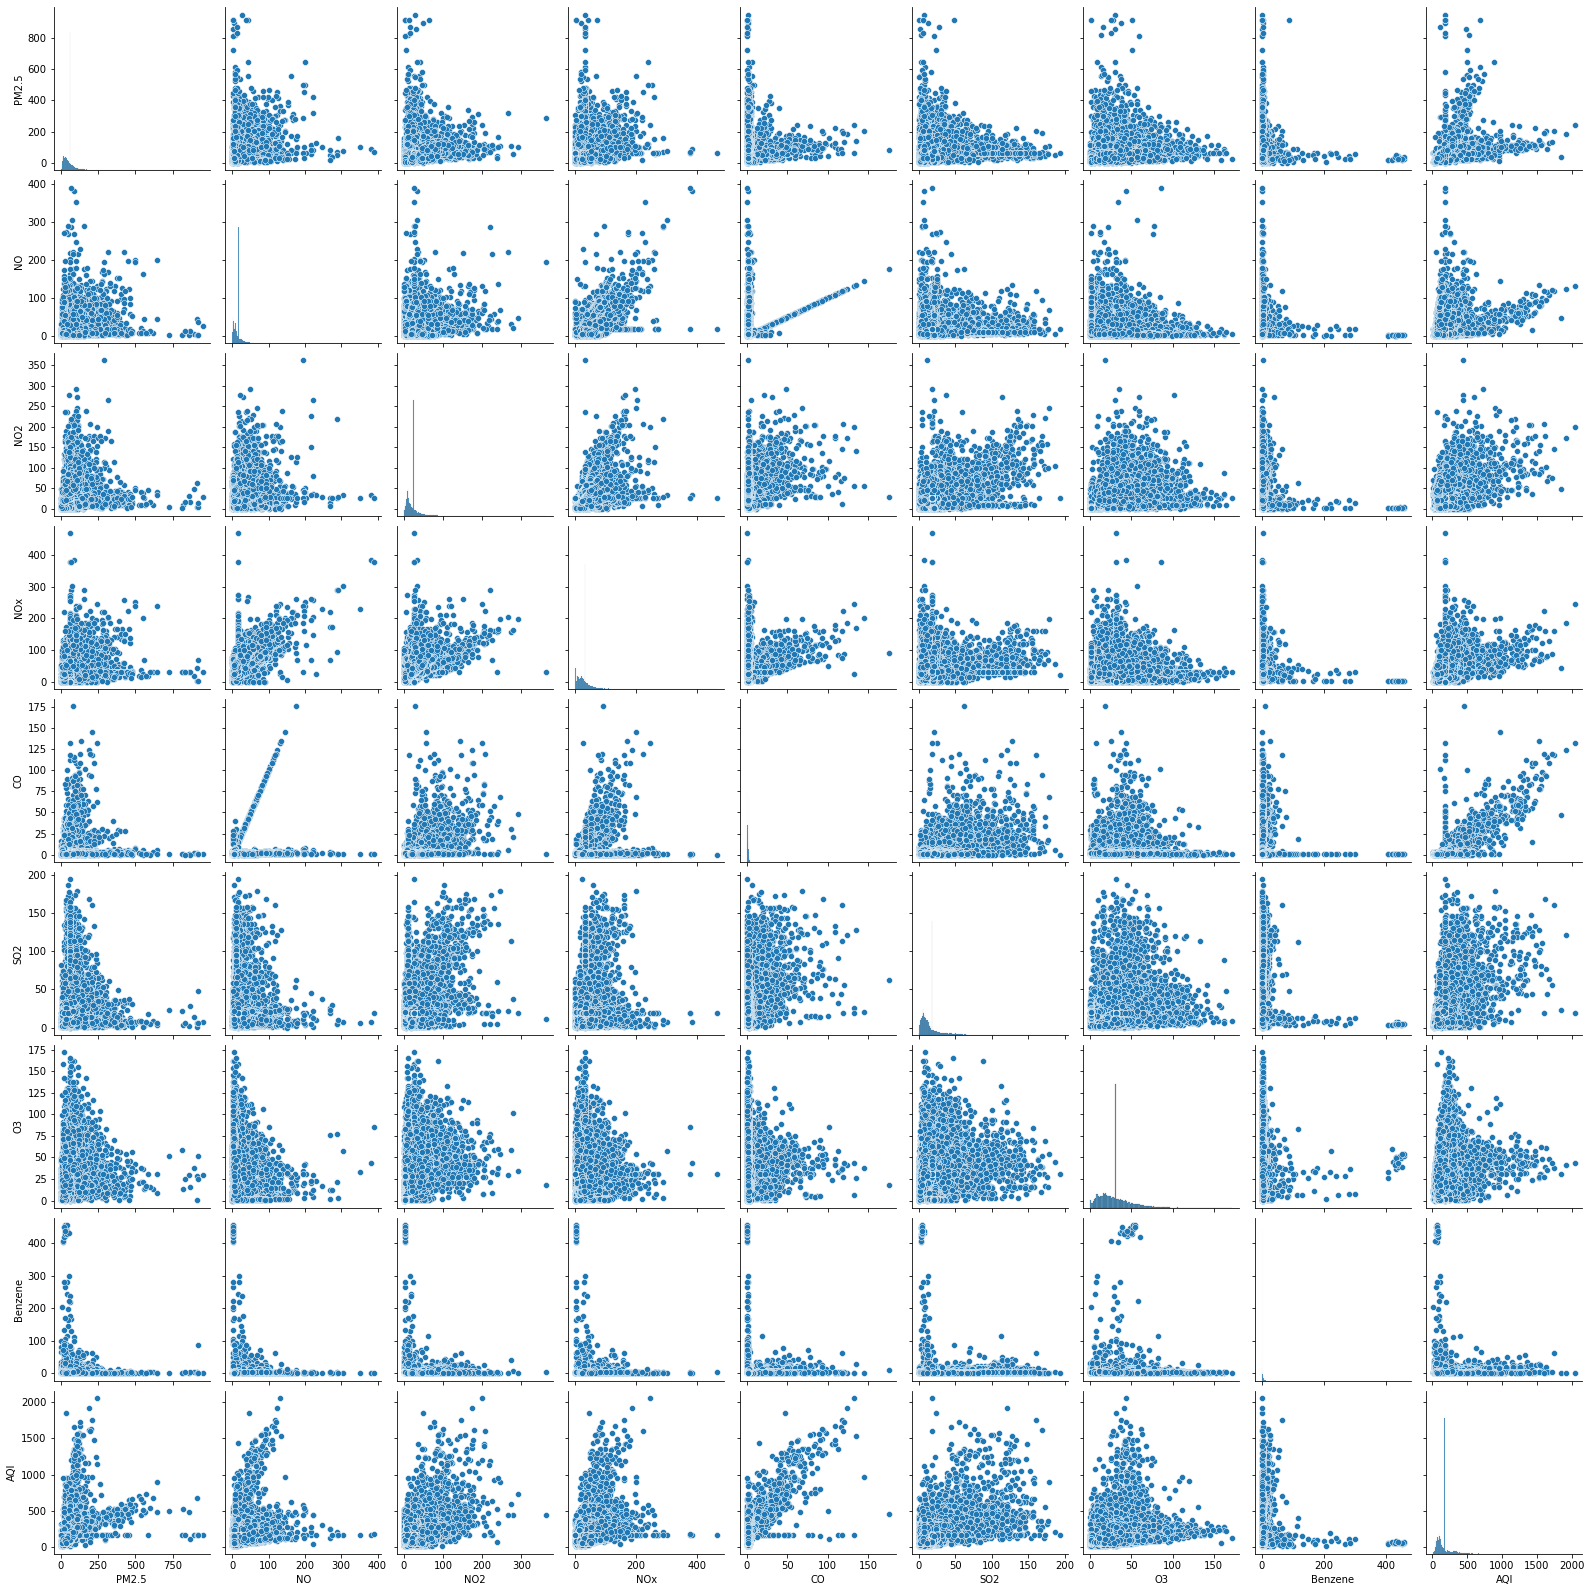

In [49]:
sns.pairplot(df)

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [51]:
df=pd.get_dummies(df,drop_first=True)

In [52]:
# seperating the dependent and independent variables
X = df.drop("AQI", axis = 1)
y = df["AQI"]

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
##normalising the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [55]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) 

In [56]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
sk_model = Lasso(alpha=0.01)

In [57]:
model = LinearRegression()

In [58]:
model = model.fit(X_train, y_train)

In [59]:
model.score(X_train, y_train)*100

89.10555656157746

In [60]:
y_pred_lr = model.predict(X_test)

In [61]:
sk_model.fit(X_train, y_train)

Lasso(alpha=0.01)

In [62]:
sk_model.score(X_train, y_train)*100

90.37359712436674

In [63]:
y_pred = sk_model.predict(X_test)

In [64]:
from sklearn import metrics
print('Linear_Regression')
print('r2_score', "{:.2f}".format(metrics.r2_score(y_test,y_pred_lr)*100))
score = metrics.r2_score(y_test,y_pred_lr)
a_r2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted_r2_score',"{:.2f}".format(a_r2*100))
print('MAE:', "{:.2f}".format(metrics.mean_absolute_error(y_test, y_pred_lr)))
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', "{:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))))

Linear_Regression
r2_score -225547693883214148491280384.00
Adjusted_r2_score -388197887716619118801059840.00
MAE: 5551749673721.61
RMSE: 214651513893395.00


In [65]:
from sklearn import metrics
print('Lasso')
print('r2_score', "{:.2f}".format(metrics.r2_score(y_test,y_pred)*100))
score = metrics.r2_score(y_test,y_pred)
a_r2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted_r2_score',"{:.2f}".format(a_r2*100))
print('MAE:', "{:.2f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE:', "{:.2f}".format(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE:', "{:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Lasso
r2_score 83.48
Adjusted_r2_score 71.57
MAE: 30.00
MSE: 3374.06
RMSE: 58.09


# Without sklearn

In [66]:
import numpy as np

class LassoRegression:
    def __init__(self, alpha, max_iter=1000, tol=1e-4):
        self.alpha = alpha
        self.max_iter = max_iter
        self.tol = tol
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X, y):
        m, n = X.shape
        theta = np.zeros(n)
        self.intercept_ = np.mean(y)
        X_centered = X - np.mean(X, axis=0)
        for iteration in range(self.max_iter):
            old_theta = theta.copy()
            for j in range(n):
                X_j = X_centered[:, j]
                y_pred = X_centered.dot(theta) + self.intercept_
                r = y - y_pred + theta[j] * X_j
                z = X_j.dot(X_j)
                if z == 0:
                    theta[j] = 0
                else:
                    theta[j] = np.sign(np.sum(X_j*r)) * max(0, np.abs(np.sum(X_j*r)) - self.alpha) / z
            self.intercept_ = np.mean(y - X_centered.dot(theta))
            if np.sum(np.abs(theta - old_theta)) < self.tol:
                break
        self.coef_ = theta
    
    def predict(self, X):
        return X.dot(self.coef_) + self.intercept_

In [ ]:
# Fit the Lasso regression model
lasso = LassoRegression(alpha=1)
lasso.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lasso.predict(X_test)

In [ ]:
import numpy as np

def r2_score(y_test, y_pred):
    sse = np.sum((y_test - y_pred) ** 2)
    sst = np.sum((y_test - np.mean(y_test)) ** 2)
    r2 = 1 - sse / sst
    return r2


In [ ]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2*100)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error:", mae)